# **Tutorial 11**


### Imports

In [1]:
import numpy as np # arrays, array operations
import scipy.stats as stats # statistics
from google.colab import files
import matplotlib.pyplot as plt # plot graphs
import pandas as pd #dataframes
import io
import xarray as xr #multidimensional dataframes
import pymc as pm
import arviz as az
import seaborn as sns
import scipy.interpolate as interpolate


!pip install bambi
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.7 MB/s eta 0:00:00


### Load Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/refs/heads/main/Data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Males and Females

In [ ]:
female = data.charges[data.sex == 'female']
male = data.charges[data.sex == 'male']

Plotting Data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

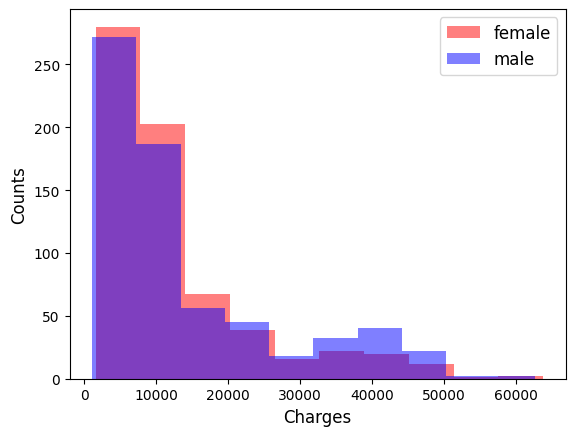

In [ ]:
plt.hist(female, color = 'red', alpha = 0.5, label = 'female')
plt.hist(male, color = 'blue', alpha = 0.5, label = 'male')
plt.legend(loc = 'upper right', fontsize = 12)
plt.xlabel('Charges', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)

plt.savefig("gender.png", bbox_inches='tight')
files.download("gender.png")

Model

In [ ]:
model_g = bmb.Model("charges ~ sex", data)
idata_g = model_g.fit(1000, chains = 4, idata_kwargs={"log_likelihood":True})


Output()

Forest plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

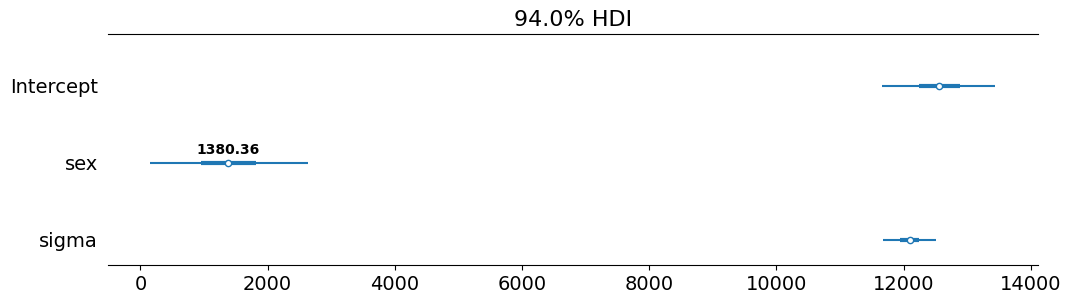

In [ ]:
ax = az.plot_forest(idata_g, combined=True, figsize=(12, 3))
mean_male = idata_g.posterior["sex"].mean()
ax[0].annotate(f"{mean_male.item():.2f}", (mean_male - 500 , 1.5), weight='bold')

plt.savefig("f.png", bbox_inches='tight')
files.download("f.png")

### Smoker

In [ ]:
smoker = data.charges[data.smoker == 'yes']
not_smoker = data.charges[data.smoker == 'no']

Plotting data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

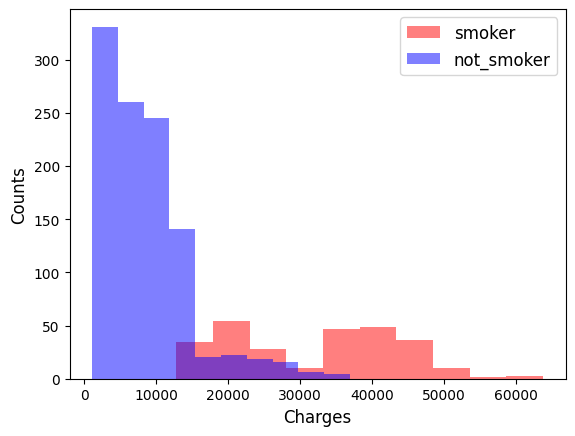

In [ ]:
plt.hist(smoker, color = 'red', alpha = 0.5, label = 'smoker')
plt.hist(not_smoker, color = 'blue', alpha = 0.5, label = 'not_smoker')
plt.legend(loc = 'upper right', fontsize = 12)
plt.xlabel('Charges', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)

plt.savefig("smoker.png", bbox_inches='tight')
files.download("smoker.png")

Model

In [ ]:
model_s = bmb.Model("charges ~ smoker", data)
idata_s = model_s.fit(1000, chains = 4, idata_kwargs={"log_likelihood":True})


Output()

Forest Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

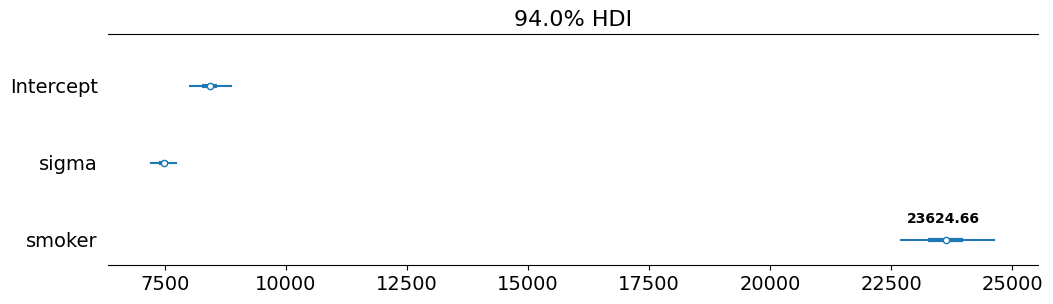

In [ ]:
ax = az.plot_forest(idata_s, combined=True, figsize=(12, 3))
mean_smoker = idata_s.posterior["smoker"].mean()
ax[0].annotate(f"{mean_smoker.item():.2f}", (mean_smoker -800, 0.3), weight='bold')

plt.savefig("f2.png", bbox_inches='tight')
files.download("f2.png")

### BMI

Plotting Data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

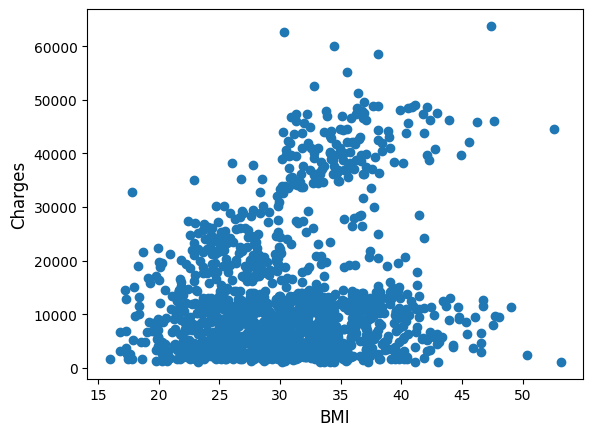

In [ ]:
plt.scatter(data.bmi, data.charges)

plt.xlabel('BMI', fontsize = 12)
plt.ylabel('Charges', fontsize = 12)

plt.savefig("bmi.png", bbox_inches='tight')
files.download("bmi.png")

Model

In [ ]:
model_b = bmb.Model("charges ~ bmi", data)
idata_b = model_b.fit(1000, chains = 4, idata_kwargs={"log_likelihood":True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

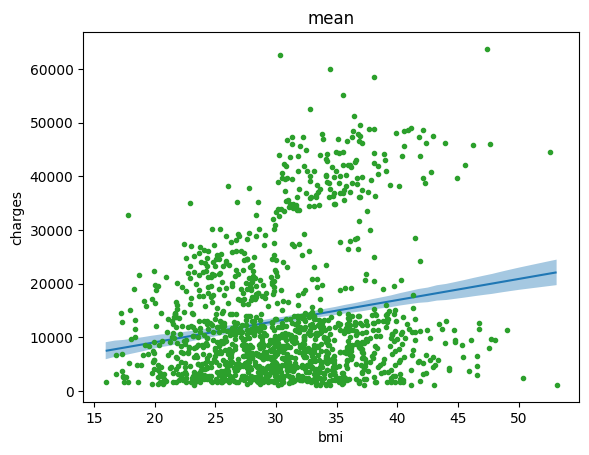

In [ ]:
bmb.interpret.plot_predictions(model_b, idata_b, "bmi")
plt.plot(data.bmi, data.charges, "C2.")
plt.title("mean")

plt.savefig("mean_post.png", bbox_inches='tight')
files.download("mean_post.png")

### Comparing the three simple models

In [ ]:
az.compare({"gender": idata_g, "smoker": idata_s, "bmi": idata_b})

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
smoker,0,-13834.573669,4.661635,0.000000,0.969206,33.333494,0.000000,False,log
bmi,1,-14454.095370,3.646334,619.521701,0.030794,31.805255,31.998370,False,log
gender,2,-14478.792620,3.760558,644.218951,0.000000,34.641730,33.406934,False,log


In [ ]:
az.compare({"gender": idata_g, "smoker": idata_s, "bmi": idata_b}, ic = 'waic')

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
smoker,0,-13834.567943,4.655909,0.000000,9.692079e-01,33.333068,0.000000,False,log
bmi,1,-14454.090570,3.641533,619.522627,3.079212e-02,31.804909,31.998102,False,log
gender,2,-14478.787836,3.755774,644.219893,6.983303e-14,34.641308,33.406654,False,log


### Multiple Regression

In [ ]:
model_sb = bmb.Model("charges ~ smoker + bmi", data)
idata_sb = model_sb.fit(1000, chains = 4, idata_kwargs={"log_likelihood":True})

Output()

Plotting

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

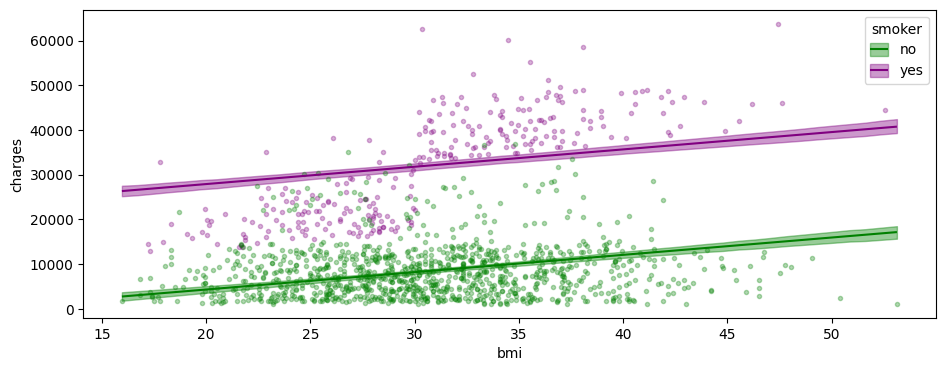

In [ ]:
fig, ax = plt.subplots(figsize=(11, 4))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["green", "purple", "red", "blue", ])
ax.plot(data.bmi[data.smoker == 'yes'], data.charges[data.smoker == 'yes'], "C1.", alpha = 0.3, label = 'smoker')
ax.plot(data.bmi[data.smoker == 'no'], data.charges[data.smoker == 'no'], "C0.", alpha = 0.3, label = 'not_smoker')
bmb.interpret.plot_predictions(model_sb, idata_sb, ["bmi", "smoker"], ax = ax)

plt.savefig("sb.png", bbox_inches='tight')
files.download("sb.png")

Comparing to the simple models

In [ ]:
az.compare({"smoker": idata_s, "bmi": idata_b, "multiple": idata_sb})

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
multiple,0,-13764.681221,5.418968,0.000000,9.715566e-01,33.350731,0.000000,False,log
smoker,1,-13834.606650,4.683506,69.925429,2.542676e-12,33.346546,11.724257,False,log
bmi,2,-14454.094539,3.615807,689.413318,2.844339e-02,31.768267,33.660494,False,log


### Interaction

In [ ]:
model_sbi = bmb.Model("charges ~ smoker + bmi + smoker:bmi", data)
idata_sbi = model_sbi.fit(1000, chains = 4, idata_kwargs={"log_likelihood":True})

Output()

Plotting

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

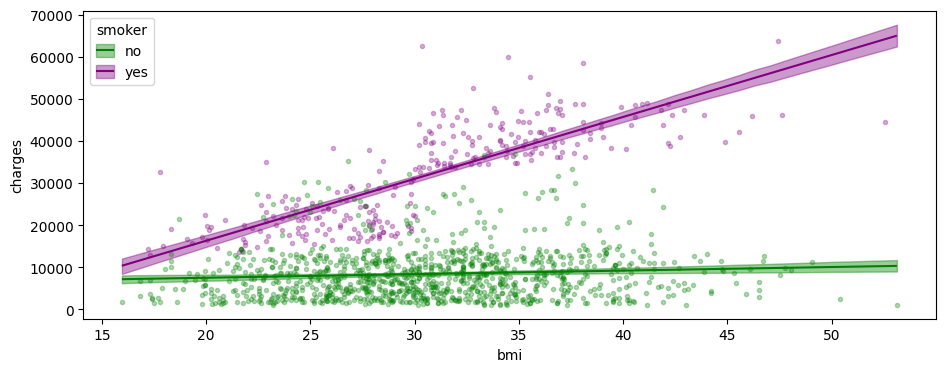

In [ ]:
fig, ax = plt.subplots(figsize=(11, 4))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["green", "purple", "red", "blue", ])
ax.plot(data.bmi[data.smoker == 'yes'], data.charges[data.smoker == 'yes'], "C1.", alpha = 0.3, label = 'smoker')
ax.plot(data.bmi[data.smoker == 'no'], data.charges[data.smoker == 'no'], "C0.", alpha = 0.3, label = 'not_smoker')
bmb.interpret.plot_predictions(model_sbi, idata_sbi, ["bmi", "smoker"], ax = ax)

plt.savefig("sbi.png", bbox_inches='tight')
files.download("sbi.png")

Comparing multiple regression models with and without interaction temrs

In [ ]:
az.compare({"multiple": idata_sb, "interaction": idata_sbi})

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
interaction,0,-13577.998320,7.025457,0.000000,0.956279,39.883593,0.000000,False,log
multiple,1,-13764.681221,5.418968,186.682901,0.043721,33.350731,19.294858,False,log
